In [8]:
#%matplotlib notebook/
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
import time

Парс входных даных и АНАЛиз

In [9]:
def open_plain_txt(path):
    file = open(path, 'r')
    text = file.read()
    file.close()
    return text

def get_params(lst):
    lst = list(filter(None, lst))
    for i in range(len(lst)):
        lst[i] = int(lst[i])
    return lst

def parse_input(path):
    text = open_plain_txt(path)
    text = text.split('\n')
    params = text[0].split(' ')
    params = get_params(params)
    pizzas = text[1:]
    pizzas = list(filter(None,pizzas))
    objs = []
    for i in range(len(pizzas)):
        objs.append(Pizza(i, pizzas[i].split(' ')))
        
    return params, objs

def get_all_ing(pizza_list):
    all_ingredients = set()
    for i in range(len(pizza_list)):
        all_ingredients = all_ingredients | set(pizza_list[i].ingredients)
    return all_ingredients

def min_extra_groups(excess):
    mod = excess%4
    num_twos = 0
    num_threes = 0
    num_fours = 0
    groups_data = [0,0,0]
    if mod:
        if mod == 1:
            num_fours = int(excess/4)-1
            num_threes = 1
            num_twos = 1
        elif mod == 2:
            num_fours = int(excess/4)
            num_twos = 1
        elif mod == 3:
            num_fours = int(excess/4)
            num_threes = 1
    else:
        num_fours = int(excess/4)
    groups_data[0] = num_twos
    groups_data[1] = num_threes
    groups_data[2] = num_fours
    return groups_data

def max_extra_groups(excess):
    mod = excess%2
    num_twos = 0
    num_threes = 0
    groups_data = [0,0,0]
    if mod:
        num_twos = int(excess/2) - 1
        num_threes = 1
    else:
        num_twos = int(excess/2)
    groups_data[0] = num_twos
    groups_data[1] = num_threes
    return groups_data

def exercise_info(params, pizza_list):
    pizza_amount = params[0]
    T2 = params[1]
    T3 = params[2]
    T4 = params[3]
    all_groups = T2 + T3 + T4
    pizzas_needed = T2 * 2 + T3 * 3 + T4 * 4
    excess = pizzas_needed - pizza_amount
    all_ingredients = get_all_ing(pizza_list)
    
    print(f'Доступно пицц: {pizza_amount}')
    print(f'Групп из 2-х человек: {T2}')
    print(f'Групп из 3-х человек: {T3}')
    print(f'Групп из 4-х человек: {T4}\n')
    print(f'Количество пицц, нужных, чтобы накормить все группы: {pizzas_needed}\n')
    print(f'Всего уникальных ингридиентов {len(all_ingredients)}')

Сортировка

In [10]:
def sort_pizza_list(pizza_list):
    sorted_pizzas = sorted(pizza_list, key=operator.attrgetter('num_ing'))
    return sorted_pizzas

Начинаем раздавать пипццы

In [11]:
def fill_T4(result, pizza_list):                                       #функция заполнения одной команды из 4-ех
    n = 0
    count = 0
    summ_point = 28
    while True:
        res = Result()
        pizzas = []
        all_ingr = set()
        if count >= 1000:
            summ_point *= 0.4                                           #если случилось более count попыток, двигаем границу
        global first, last
#         if (last - first) < 4:                                        эти строчки скорее всего не нужны
#             first -= 8
        for i in range(1, 5):
            try:                                                            #возможно надо добавить (try except) для random
                n = random.randint(first, last)
                random_pizza = pizza_list[n]                                #выбираем рандомную пиццу
                while (random_pizza in pizzas):                             #если уже была выбрана - выбираем другую
                    n = random.randint(first, last)
                    random_pizza = pizza_list[n]
            except:
#                 print(f'first = {first}, last = {last}')
#                 print(f'n = {n}  len(pizza_list) = {len(pizza_list)}')
                return -1
            pizzas.append(random_pizza)                                 #запоминаем выбор
        for p in pizzas:
            all_ingr.update(p.ingredients)                              #находим объединеие игнредиентов 
        if len(all_ingr) >= summ_point:                                       #если уинкальных ингр-ов >= summ_point - все хорошо
            for p in pizzas:
                pizza_list.remove(p)
            last -= 4
            res.pizzas = pizzas
            res.player = 4
            res.point = len(all_ingr)**2
            result.append(res)                                          #добавляем команду в result
            return
        count += 1

In [12]:
def fill_T3(result, pizza_list):                                        #функция заполнения одной команды из 3-ех
    n = 0
    count = 0
    summ_point = 21
    while True:
        res = Result()
        pizzas = []
        all_ingr = set()
        if count >= 1000:
            summ_point *= 0.4                                           #если случилось более count попыток, двигаем границу
        global first, last
        for i in range(1, 4):
            try:                                                            #возможно надо добавить (try except) для random
                n = random.randint(first, last)
                random_pizza = pizza_list[n]                                #выбираем рандомную пиццу
                while (random_pizza in pizzas):                             #если уже была выбрана - выбираем другую
                    n = random.randint(first, last)
                    random_pizza = pizza_list[n]
            except:
#                 print(f'first = {first}, last = {last}')
#                 print(f'n = {n}  len(pizza_list) = {len(pizza_list)}')
                return -1
            pizzas.append(random_pizza)                                 #запоминаем выбор
        for p in pizzas:
            all_ingr.update(p.ingredients)
        if len(all_ingr) >= summ_point:                                       #если уинкальных ингр-ов >= summ_point - все хорошо
            for p in pizzas:
                pizza_list.remove(p)
            last -= 3
            res.pizzas = pizzas
            res.player = 3
            res.point = len(all_ingr)**2
            result.append(res)                                          #добавляем команду в result
            return
        count += 1

In [13]:
def fill_T2(result, pizza_list):                                        #функция заполнения одной команды из 2-ух
    n = 0
    count = 0
    summ_point = 14
    while True:
        res = Result()
        pizzas = []
        all_ingr = set()
        if count >= 1000:
            summ_point *= 0.4                                          #если случилось более 5 попыток, двигаем границу
        global first, last
        for i in range(1, 3):
            try:                                                            #возможно надо добавить (try except) для random
                n = random.randint(first, last)
                random_pizza = pizza_list[n]                                #выбираем рандомную пиццу
                while (random_pizza in pizzas):                             #если уже была выбрана - выбираем другую
                    n = random.randint(first, last)
                    random_pizza = pizza_list[n]
            except:
#                 print(f'first = {first}, last = {last}')
#                 print(f'n = {n}  len(pizza_list) = {len(pizza_list)}')
                return -1
            pizzas.append(random_pizza)                                 #запоминаем выбор
        for p in pizzas:
            all_ingr.update(p.ingredients)
        if len(all_ingr) >= summ_point:                                       #если уинкальных ингр-ов >= summ_point - все хорошо
            for p in pizzas:
                pizza_list.remove(p)
            last -= 2
            res.pizzas = pizzas
            res.player = 2
            res.point = len(all_ingr)**2
            result.append(res)                                          #добавляем команду в result
            return
        count += 1

In [14]:
def fill_all_commands(T2, T3, T4, pizza_list):
    result = []
    print(f'T2 + T3 + T4 = {T2 + T3 + T4}')
    global first, last
    #last и first - это диапапзон из которого будем выбирать
    last = len(pizza_list) - 1
#     first = int(last * 0.6)
    first = 0
    while T4 > 0:
        fill_T4(result, pizza_list)
        T4 -= 1
    last = len(pizza_list) - 1
#     first = int(last * 0.6)
    while T3 > 0:
        fill_T3(result, pizza_list)
        T3 -= 1
    last = len(pizza_list) - 1
    first = 0
    while T2 > 0:
        fill_T2(result, pizza_list)
        T2 -= 1
    #Вывод баллов команд
    print(f'len(result) = {len(result)}')
    all_point = 0
    for i in result:
        all_point += i.point
    print(f'всего очков = {all_point}')
    return result

In [15]:
#Тут просто мемы
for i in range(1, 4):
    print(i)

pizza = []
p = 0
if p in pizza:
    print('test')

a = 100    
def f1(arg):
    global a
    print (f'arg = {arg}  a = {a}')
    a -= 10

f1('вызов_1')
f1('вызов_2')

r = []
print(f'len(r) = {len(r)}')
def f2(r):
    re = Result()
    r.append(re)
f2(r)
print(f'len(r) = {len(r)}')

1
2
3
arg = вызов_1  a = 100
arg = вызов_2  a = 90
len(r) = 0
len(r) = 1


Классы

In [16]:
class Pizza():
    def __init__(self, idx, lst):
        self.idx = idx
        self.num_ing = int(lst[0])
        self.ingredients = lst[1:]

class Result():
    def __init__(self):
        self.point = 0
        self.pizzas = []
        self.player = 0

Запуск парсеа и статистики

In [17]:
params, pizza_list = parse_input('a_example')
sorted_pizza = sort_pizza_list(pizza_list)
# for i in sorted_pizza:
#     print(i.num_ing, end='\n')

In [18]:
#Сколько всего ингредиетов
summ = 0
for s_p in sorted_pizza:
    summ += len(s_p.ingredients)
print(f'всего игредиетов = {summ}')

всего игредиетов = 14


In [19]:
#Вывод полезых значений
max_igr_in_pizza = sorted_pizza[0]
min_igr_in_pizza = sorted_pizza[-1]
print(f'Минимальное кол-во ингредиетов = {len(max_igr_in_pizza.ingredients)}')
print(f'Максимальное кол-во ингредиетов = {len(min_igr_in_pizza.ingredients)}')

Минимальное кол-во ингредиетов = 2
Максимальное кол-во ингредиетов = 3


Доступно пицц: 5
Групп из 2-х человек: 1
Групп из 3-х человек: 2
Групп из 4-х человек: 1

Количество пицц, нужных, чтобы накормить все группы: 12

Всего уникальных ингридиентов 7


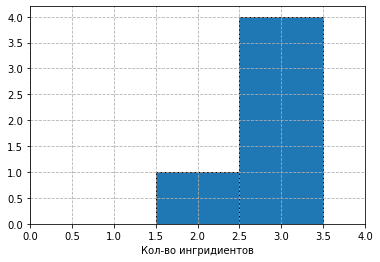

In [20]:
#Гистограмма распределения количества ингридиентов.

nums = []
for i in range(params[0]):
    nums.append(pizza_list[i].num_ing)

plt.figure(1)
plt.clf()
plt.hist(nums, bins=np.arange(min(nums), max(nums)+2), align = 'left', edgecolor = 'black')
plt.grid(linestyle = '--')
plt.xlim(0,max(nums)+1)
plt.xlabel('Кол-во ингридиентов')
exercise_info(params, pizza_list)

In [ ]:
#Распределение пицц
T2 = params[1]
T3 = params[2]
T4 = params[3]
print(f'len(sorted_pizza) = {len(sorted_pizza)}')
fill_all_commands(T2, T3, T4, sorted_pizza)

len(sorted_pizza) = 5
T2 + T3 + T4 = 4
